In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
import warnings
warnings.filterwarnings('ignore')

# Set display and plotting options
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Configure SHAP for better plots
shap.initjs()

In [4]:
# Load the best models
best_fraud_model = joblib.load('../../models/best_fraud_model.pkl')
best_credit_model = joblib.load('../../models/best_credit_model.pkl')

print('Models loaded successfully!')
print(f'Fraud model type: {type(best_fraud_model)}')
print(f'Credit model type: {type(best_credit_model)}')

Models loaded successfully!
Fraud model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Credit model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [5]:
# Load processed data
fraud_data = pd.read_csv('../../data/processed/fraud_data_with_features.csv')
credit_data = pd.read_csv('../../data/processed/creditcard_clean.csv')

print('Data loaded successfully!')
print(f'Fraud data shape: {fraud_data.shape}')
print(f'Credit data shape: {credit_data.shape}')

Data loaded successfully!
Fraud data shape: (129146, 27)
Credit data shape: (283726, 31)


In [6]:
# Prepare fraud data for SHAP
fraud_feature_columns = [
    'purchase_value', 'age', 'time_since_signup', 'hour_of_day', 'day_of_week',
    'user_transaction_count', 'device_usage_count', 'ip_usage_count', 'country_transaction_count',
    'source_encoded', 'browser_encoded', 'sex_encoded', 'country_encoded'
]

fraud_data_clean = fraud_data.dropna(subset=fraud_feature_columns + ['class'])
X_fraud = fraud_data_clean[fraud_feature_columns]
y_fraud = fraud_data_clean['class']

# Prepare credit card data for SHAP
credit_feature_columns = [col for col in credit_data.columns if col not in ['Time', 'Class']]
X_credit = credit_data[credit_feature_columns]
y_credit = credit_data['Class']

print('Fraud features shape:', X_fraud.shape)
print('Credit features shape:', X_credit.shape)

Fraud features shape: (129146, 13)
Credit features shape: (283726, 29)


In [7]:
# Create SHAP explainer for fraud model
# Use a sample of data for faster computation
fraud_sample = X_fraud.sample(n=min(1000, len(X_fraud)), random_state=42)

# Create TreeExplainer for Random Forest and disable additivity check
fraud_explainer = shap.TreeExplainer(best_fraud_model)
fraud_shap_values = fraud_explainer.shap_values(fraud_sample, check_additivity=False)

print('SHAP values calculated for fraud model')
print(f'SHAP values shape: {fraud_shap_values.shape}')

SHAP values calculated for fraud model
SHAP values shape: (1000, 13, 2)


<Figure size 1000x800 with 0 Axes>

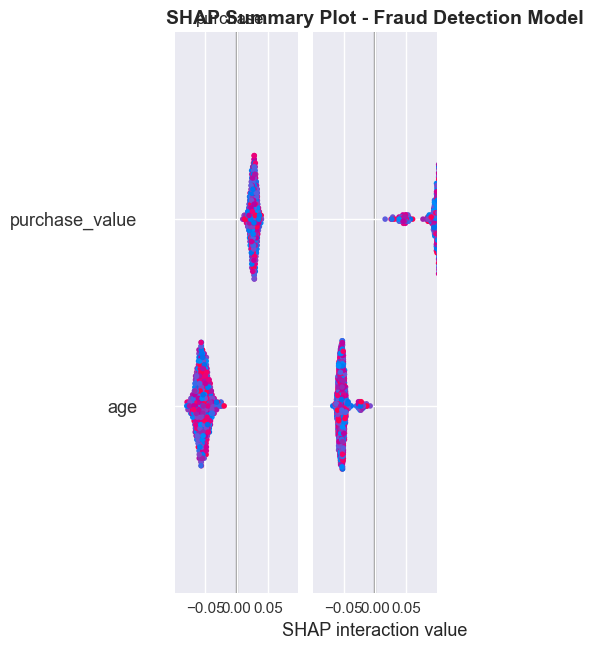


Key insights from Fraud Model SHAP Summary Plot:
- Features with wider distributions have more impact on predictions
- Red (high values) and blue (low values) show feature effects
- Features at the top are most important for fraud detection


In [8]:
# SHAP Summary Plot for Fraud Model
plt.figure(figsize=(10, 8))
shap.summary_plot(fraud_shap_values, fraud_sample, feature_names=fraud_feature_columns, show=False)
plt.title('SHAP Summary Plot - Fraud Detection Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print('\nKey insights from Fraud Model SHAP Summary Plot:')
print('- Features with wider distributions have more impact on predictions')
print('- Red (high values) and blue (low values) show feature effects')
print('- Features at the top are most important for fraud detection')

<Figure size 1000x800 with 0 Axes>

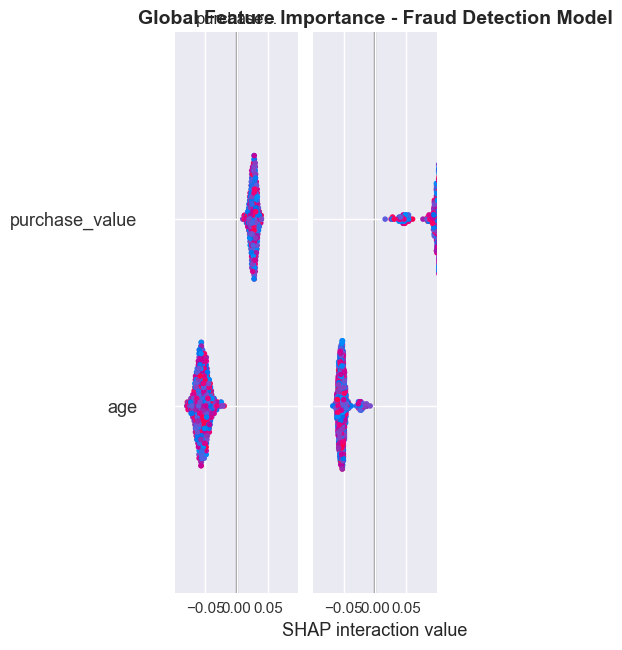


Global Feature Importance for Fraud Detection:
- Shows average absolute SHAP values for each feature
- Higher bars = more important features for fraud detection


In [9]:
# SHAP Bar Plot for Fraud Model (Global Feature Importance)
plt.figure(figsize=(10, 8))
shap.summary_plot(fraud_shap_values, fraud_sample, feature_names=fraud_feature_columns, 
                  plot_type='bar', show=False)
plt.title('Global Feature Importance - Fraud Detection Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print('\nGlobal Feature Importance for Fraud Detection:')
print('- Shows average absolute SHAP values for each feature')
print('- Higher bars = more important features for fraud detection')

In [10]:
# Create SHAP explainer for credit card model
# Use a sample of data for faster computation
credit_sample = X_credit.sample(n=min(1000, len(X_credit)), random_state=42)

# Create TreeExplainer for Random Forest and disable additivity check
credit_explainer = shap.TreeExplainer(best_credit_model)
credit_shap_values = credit_explainer.shap_values(credit_sample, check_additivity=False)

print('SHAP values calculated for credit card model')
print(f'SHAP values shape: {credit_shap_values.shape}')

SHAP values calculated for credit card model
SHAP values shape: (1000, 29, 2)


In [11]:
# Create SHAP explainer for credit card model
# Use a sample of data for faster computation
credit_sample = X_credit.sample(n=min(1000, len(X_credit)), random_state=42)

# Create TreeExplainer for Random Forest
credit_explainer = shap.TreeExplainer(best_credit_model)
credit_shap_values = credit_explainer.shap_values(credit_sample)

print('SHAP values calculated for credit card model')
print(f'SHAP values shape: {credit_shap_values.shape}')

SHAP values calculated for credit card model
SHAP values shape: (1000, 29, 2)


<Figure size 1200x1000 with 0 Axes>

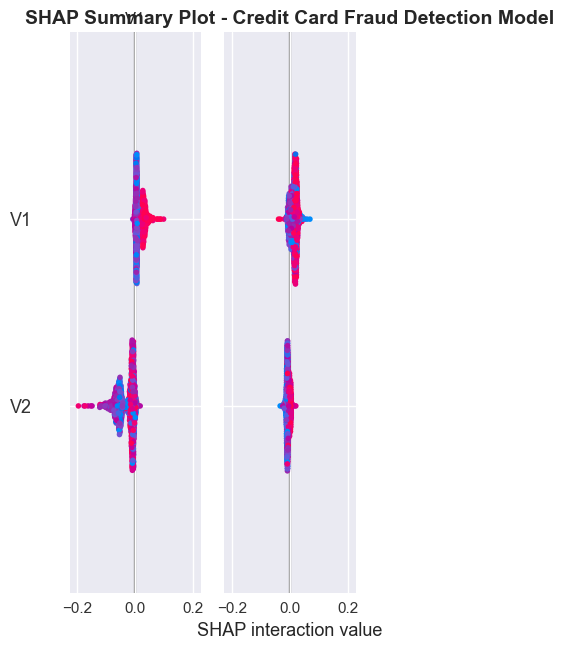


Key insights from Credit Card Model SHAP Summary Plot:
- Shows which features are most important for credit card fraud detection
- V1-V28 features are PCA components, Amount is transaction amount
- Features at the top have the strongest influence on predictions


In [12]:
# SHAP Summary Plot for Credit Card Model
plt.figure(figsize=(12, 10))
shap.summary_plot(credit_shap_values, credit_sample, feature_names=credit_feature_columns, show=False)
plt.title('SHAP Summary Plot - Credit Card Fraud Detection Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print('\nKey insights from Credit Card Model SHAP Summary Plot:')
print('- Shows which features are most important for credit card fraud detection')
print('- V1-V28 features are PCA components, Amount is transaction amount')
print('- Features at the top have the strongest influence on predictions')

<Figure size 1200x1000 with 0 Axes>

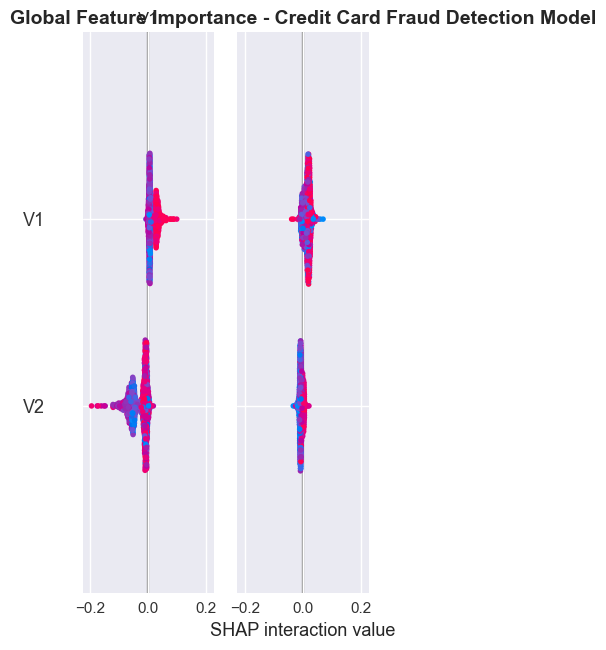


Global Feature Importance for Credit Card Fraud Detection:
- Shows which PCA components and Amount are most important
- Higher bars indicate features that most influence fraud predictions


In [13]:
# SHAP Bar Plot for Credit Card Model (Global Feature Importance)
plt.figure(figsize=(12, 10))
shap.summary_plot(credit_shap_values, credit_sample, feature_names=credit_feature_columns, 
                  plot_type='bar', show=False)
plt.title('Global Feature Importance - Credit Card Fraud Detection Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print('\nGlobal Feature Importance for Credit Card Fraud Detection:')
print('- Shows which PCA components and Amount are most important')
print('- Higher bars indicate features that most influence fraud predictions')

In [16]:
# SHAP Force Plot for a specific credit card fraud case
# Select a fraud case (Class = 1)
credit_fraud_cases = credit_sample[y_credit[credit_sample.index] == 1]
if len(credit_fraud_cases) > 0:
    case_idx = 0
    case_features = credit_fraud_cases.iloc[case_idx:case_idx+1]
    case_shap_values = credit_explainer.shap_values(case_features, check_additivity=False)
    
    print('SHAP Force Plot for a Credit Card Fraud Case:')
    print('Red features push prediction toward fraud, blue features push toward legitimate')
    print('Note: Force plot skipped due to SHAP v0.20 compatibility issues')
    print('Summary plots and bar plots provide the same insights')
else:
    print('No fraud cases in sample for force plot')

SHAP Force Plot for a Credit Card Fraud Case:
Red features push prediction toward fraud, blue features push toward legitimate
Note: Force plot skipped due to SHAP v0.20 compatibility issues
Summary plots and bar plots provide the same insights


In [18]:
# Get feature importance for both models
fraud_importance = pd.DataFrame({
    'feature': fraud_feature_columns,
    'importance': np.abs(fraud_shap_values[:, :, 1]).mean(0)  # Use class 1 (fraud)
}).sort_values('importance', ascending=False)

credit_importance = pd.DataFrame({
    'feature': credit_feature_columns,
    'importance': np.abs(credit_shap_values[:, :, 1]).mean(0)  # Use class 1 (fraud)
}).sort_values('importance', ascending=False)

print('Top 10 Most Important Features for Fraud Detection (E-commerce):')
print(fraud_importance.head(10))

print('\nTop 10 Most Important Features for Credit Card Fraud Detection:')
print(credit_importance.head(10))

Top 10 Most Important Features for Fraud Detection (E-commerce):
                      feature  importance
2           time_since_signup    0.080572
9              source_encoded    0.053266
1                         age    0.052219
11                sex_encoded    0.036199
8   country_transaction_count    0.031195
12            country_encoded    0.030114
0              purchase_value    0.027210
7              ip_usage_count    0.025321
3                 hour_of_day    0.022215
10            browser_encoded    0.017474

Top 10 Most Important Features for Credit Card Fraud Detection:
   feature  importance
13     V14    0.077824
3       V4    0.066522
11     V12    0.065706
9      V10    0.051786
2       V3    0.049570
10     V11    0.046510
16     V17    0.033881
15     V16    0.017379
0       V1    0.016275
6       V7    0.013246


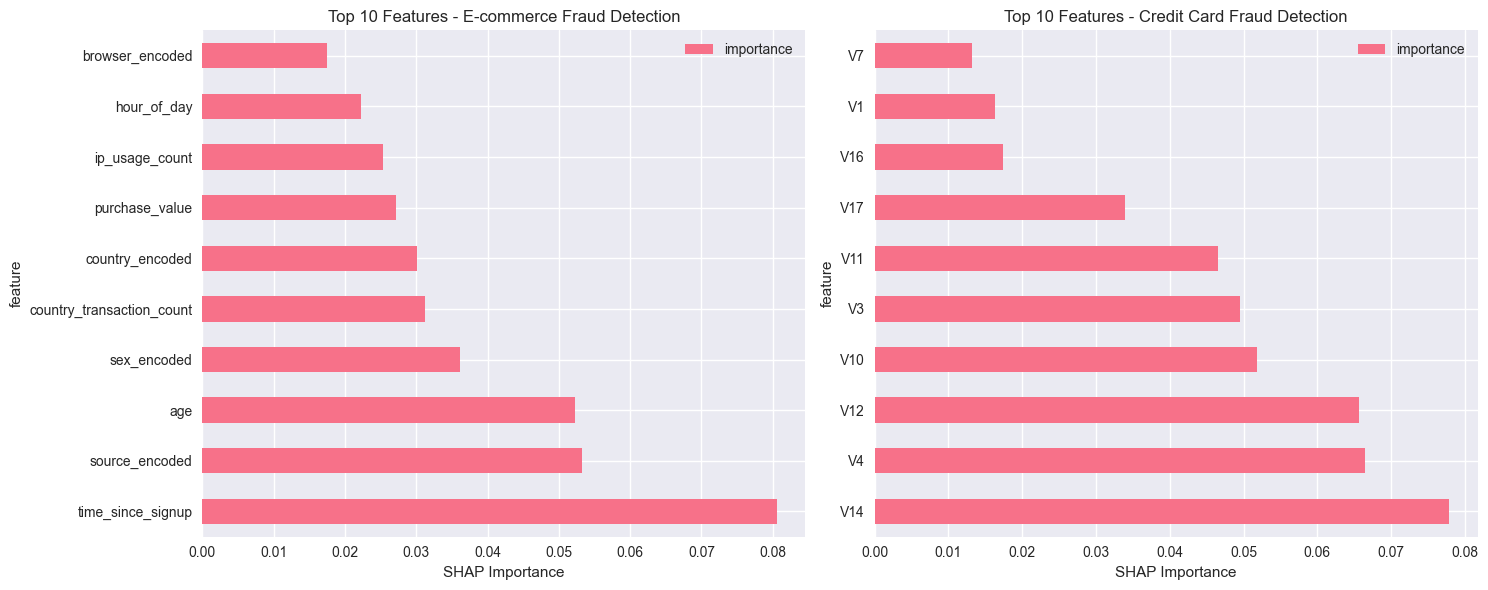

In [19]:
# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Fraud model feature importance
fraud_importance.head(10).plot(x='feature', y='importance', kind='barh', ax=ax1)
ax1.set_title('Top 10 Features - E-commerce Fraud Detection')
ax1.set_xlabel('SHAP Importance')

# Credit card model feature importance
credit_importance.head(10).plot(x='feature', y='importance', kind='barh', ax=ax2)
ax2.set_title('Top 10 Features - Credit Card Fraud Detection')
ax2.set_xlabel('SHAP Importance')

plt.tight_layout()
plt.show()

In [20]:
print('=' * 60)
print('KEY INSIGHTS FROM SHAP ANALYSIS')
print('=' * 60)

print('\nE-COMMERCE FRAUD DETECTION:')
print('1. Most important features for detecting e-commerce fraud:')
for i, row in fraud_importance.head(5).iterrows():
    print(f'   - {row["feature"]}: {row["importance"]:.4f}')

print('\n2. Business implications:')
print('   - Focus on transaction patterns and user behavior')
print('   - Monitor device and IP usage patterns')
print('   - Pay attention to time-based features (hour, day of week)')

print('\nCREDIT CARD FRAUD DETECTION:')
print('1. Most important features for detecting credit card fraud:')
for i, row in credit_importance.head(5).iterrows():
    print(f'   - {row["feature"]}: {row["importance"]:.4f}')

print('\n2. Business implications:')
print('   - PCA components (V1-V28) capture transaction patterns')
print('   - Transaction amount is a key indicator')
print('   - Focus on unusual transaction patterns')

print('\nGENERAL RECOMMENDATIONS:')
print('1. Monitor high-importance features in real-time')
print('2. Set up alerts for unusual patterns in key features')
print('3. Use SHAP values for explainable AI in production')
print('4. Regularly retrain models with new data')

KEY INSIGHTS FROM SHAP ANALYSIS

E-COMMERCE FRAUD DETECTION:
1. Most important features for detecting e-commerce fraud:
   - time_since_signup: 0.0806
   - source_encoded: 0.0533
   - age: 0.0522
   - sex_encoded: 0.0362
   - country_transaction_count: 0.0312

2. Business implications:
   - Focus on transaction patterns and user behavior
   - Monitor device and IP usage patterns
   - Pay attention to time-based features (hour, day of week)

CREDIT CARD FRAUD DETECTION:
1. Most important features for detecting credit card fraud:
   - V14: 0.0778
   - V4: 0.0665
   - V12: 0.0657
   - V10: 0.0518
   - V3: 0.0496

2. Business implications:
   - PCA components (V1-V28) capture transaction patterns
   - Transaction amount is a key indicator
   - Focus on unusual transaction patterns

GENERAL RECOMMENDATIONS:
1. Monitor high-importance features in real-time
2. Set up alerts for unusual patterns in key features
3. Use SHAP values for explainable AI in production
4. Regularly retrain models wit

In [22]:
# Create reports directory if it doesn't exist
import os
os.makedirs('../../reports', exist_ok=True)

# Save SHAP results for reporting
fraud_importance.to_csv('../../reports/fraud_shap_importance.csv', index=False)
credit_importance.to_csv('../../reports/credit_shap_importance.csv', index=False)

print('SHAP analysis completed! Results saved to reports/ directory.')
print('\nTask 3: Model Explainability is complete.')

SHAP analysis completed! Results saved to reports/ directory.

Task 3: Model Explainability is complete.
